In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12

### 3.11 원통형 저장고 내부액체의 부피

#### $$ V = [r^2\cos^{-1}(\frac{r - h}{r}) - (r - h)\sqrt{2rh - h^2}]L $$

* V = 저장고 내부의 액체의 부피
* r = 반지름
* L = 길이
* h = 원통 중심선으로 부터 액체의 깊이

In [12]:
%matplotlib inline
def cyltank(r,L,plot_title):    
    """
    원통안 액체의 부피를 구한후 h vs V 그래프를 그림

    parameters
    -----------
        r (_int_): 원통안 액체의 높이
        L (_int_): 원통의 높이
        plot_title (_str_): 그래프 이름
    return
    ------------
    Nan
    """ 
    # -1 < (r-h)/r < 1 -> h < 2r 
    # h < L 
    if L > 2*r:
        h = np.linspace(0,2*r,50)
    else:
        h = np.linspace(0,L,50)
             
    V =  (r**2*np.arccos((r - h)/r) - (r -h)*np.sqrt(2*r*h - h**2)) * L
    
    plt.figure(figsize=(8,6))
    plt.plot(h,V)
    plt.xlabel(r'$h$')
    plt.ylabel(r'$V$')
    plt.title(plot_title)
    plt.show()

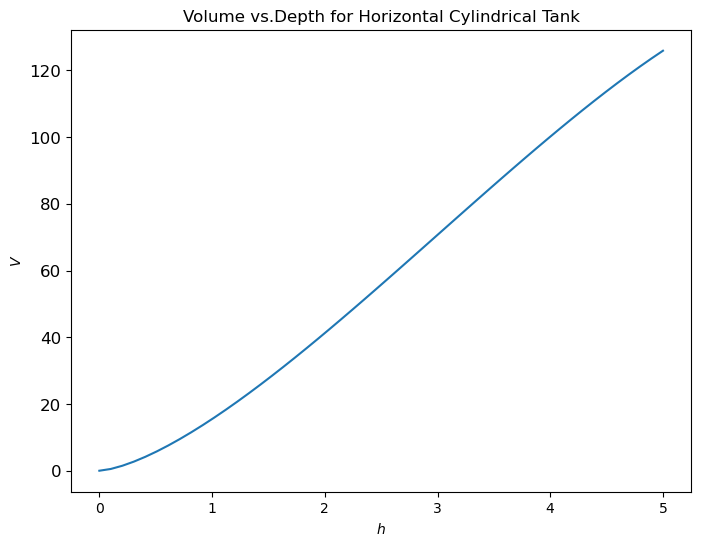

In [4]:
cyltank(3,5,'Volume vs.Depth for Horizontal Cylindrical Tank')

### 3.17 윤년 계산하기

In [11]:
def leap_year(year):
    a = np.arange(1,1000)
    n = 1000
    new_centry = a * n
    new_centry = new_centry.tolist()
    if (year in new_centry) and (year % 400 == 0):
        print(f'{year}: not leap year, 4로 나누어 떨어지지만 세기가 바뀔떄 400으로 나누어 떨어짐')
        return
    if year % 4 == 0:
        print(f'{year}: leap year, 4로 나누어 떨어짐')
    else:
        print(f'{year}: not leap year, 4로 나누어 떨어지지 않음')
leap_year(2000)
leap_year(2001)
leap_year(1000)

2000: not leap year, 4로 나누어 떨어지지만 세기가 바뀔떄 400으로 나누어 떨어짐
2001: not leap year, 4로 나누어 떨어지지 않음
1000: leap year, 4로 나누어 떨어짐


### 3.25 transpose temperature

$$ \frac{(F - 32)}{1.8} = C $$
$$ (C \times 1.8) + 32 = F $$

* F = 화씨온도
* C = 섭씨온도

In [6]:

day = np.array([15,45,75,105,135,165,195,225,255,285,315,345])
tfdv = np.array([54,60,69,77,87,96,102,101,92,78,63,52])
tcsp = np.array([-27,-40,-53,-56,-57,-57,-59,-59,-59,-50,-38,-27])
n = len(day)
tcdv = np.zeros(n)
tfsp = np.zeros(n)

def tempconv(tempin):    
    """ 온도의 단위를 변환한후 day vs temp 그래프를 그림

    parameters
    -----------
        tempin (_array_): _온도_
    return
    -----------
    Nan
    """
    if tempin in tfdv:
        for i in range(len(day)):        
            C = (tempin[i] - 32)/1.8
            tcdv[i] = C
        
        fig, axs = plt.subplots(figsize=(8,6), ncols = 2, nrows = 1,constrained_layout=True)
        plt.title('Death valley F -> C', x = -0.3)
        sns.barplot(x = day,y = tempin,ax=axs[0])
        axs[0].set_xlabel('day')
        axs[0].set_ylabel('F')
        sns.barplot(x = day,y = tcdv,ax=axs[1])
        axs[1].set_xlabel('day')
        axs[1].set_ylabel('C')
    
    elif tempin in tcsp:
        for i in range(len(day)):
            F = (tempin[i] * 1.8) + 32
            tfsp[i] = F
        
        fig, axs = plt.subplots(figsize=(8,6), ncols = 2, nrows = 1,constrained_layout=True)
        plt.title('South Pole C -> F', x = -0.3)
        sns.barplot(x = day,y = tempin, ax= axs[0])
        axs[0].set_xlabel('day')
        axs[0].set_ylabel('C')
        sns.barplot(x = day,y = tfsp, ax = axs[1])
        axs[1].set_xlabel('day')
        axs[1].set_ylabel('F')
        plt.show()    

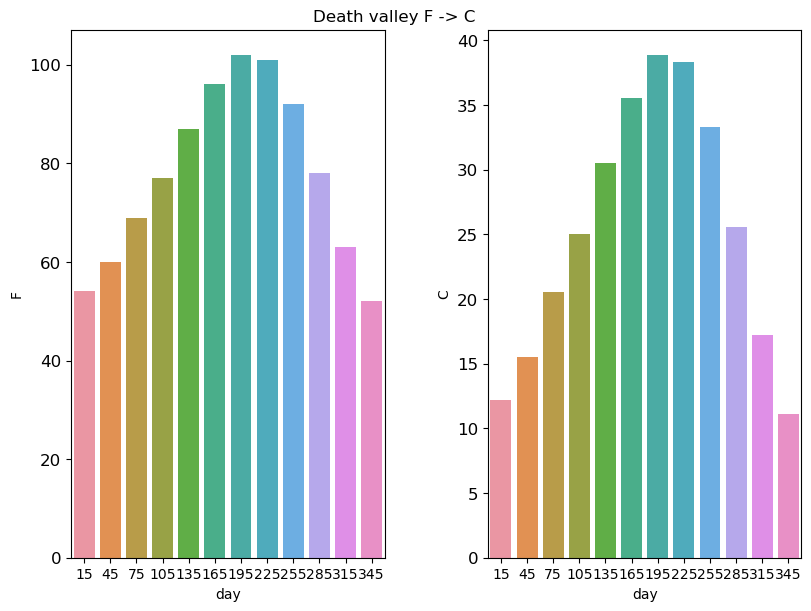

In [7]:
tempconv(tfdv)

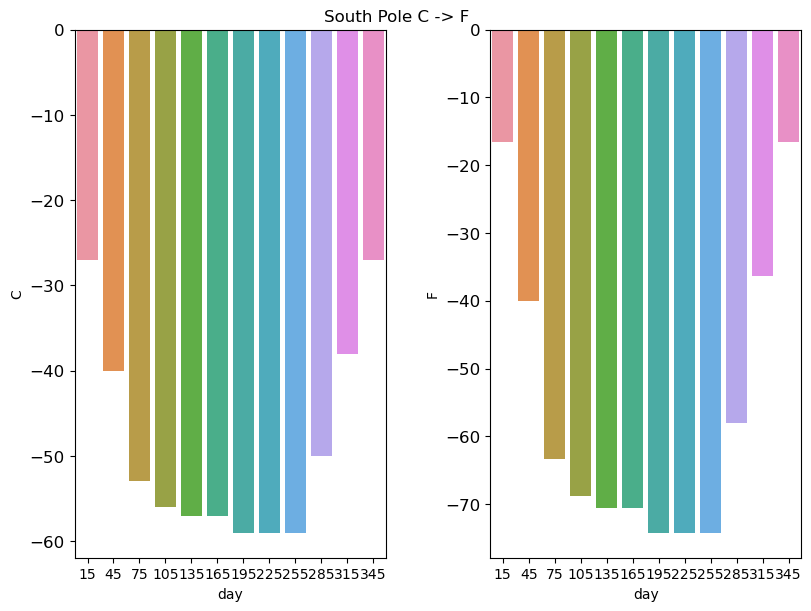

In [8]:
tempconv(tcsp)